## Introduction

**Adding a logo** to your [matplotlib graphics](https://python-graph-gallery.com/matplotlib/) can be a bit tricky when you've never done it before. With this in mind, let's take a look at what to do if you want to add an image or logo to your beautiful [matplotlib graphics](https://python-graph-gallery.com/matplotlib/).

## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) for displaying the chart and the logo
- `numpy` is used for manipulating the image as an array
- `PIL` for opening the image
- `requests` is used to send an HTTP GET request to the specified URL to download the image content
- `io` is used to create a file-like object in memory to hold the image content that is downloaded using the requests library

Don't forget to install PIL if you haven't already done so with the `pip install Pillow` command.

In [11]:
# Libraries
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

## Open or Load the image

We'll look at two cases: using an **image stored locally** on your computer and using an **image from the Internet** using only the url address.

- Image stored locally: make sure you write the **right path** (in the following example, `/Users/josephbarbier/Desktop/python graph gallery/github_logo.png` is the location of the image on my computer). The image I chosed is just a basic png github logo. 

- Image from the Internet: we need to make sure we complete the objective with **some test**. With the `if` statement, we are checking whether the **HTTP response status code is equal to 200**. In the context of HTTP, a status code of 200 means *"OK"*, indicating that the request was successful and the server has responded with the **requested content**. If this test is passed, then we just have to get the content from the request and open the image!

In [23]:
# Open an image from a computer 
def open_image_local(path_to_image):
    image = Image.open(path_to_image) # Open the image
    image_array = np.array(image) # Convert to a numpy array
    return image_array # Output

# Open the image from my computer
image = open_image_local('/Users/josephbarbier/Desktop/python graph gallery/github_logo.png')

In [22]:
# Open an image from the Internet
def open_image_internet(url_adress):
    response = requests.get(url_adress) # Send http request to the url adress
    
    # Make sure everything went right
    if response.status_code == 200:
        image_bytes = BytesIO(response.content) # Get content 
        image = Image.open(image_bytes) # Open the image
        return image # Output
    else:
        print("Failed to download image:", response.status_code)

# Open image from the Internet
image = open_image_internet('https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png')

## Create a simple plot with a logo

Now let's create a **simple graph** with a **logo** at bottom left. First, we have to define some data and **plot them**. In our case, we will create a [scatter plot](https://python-graph-gallery.com/scatter-plot/) since it's a very simple chart.

Once we've done that, we need to define some parameters:
- `x-axis position`
- `y-axis position`
- `Image width`
- `Image height`

It's **difficult to set these automatically**, as the appropriate values **may vary** from one graph to another. Unless you have something else, the *simplest thing to do* is to test several positions and dimensions until you find **the best one**.

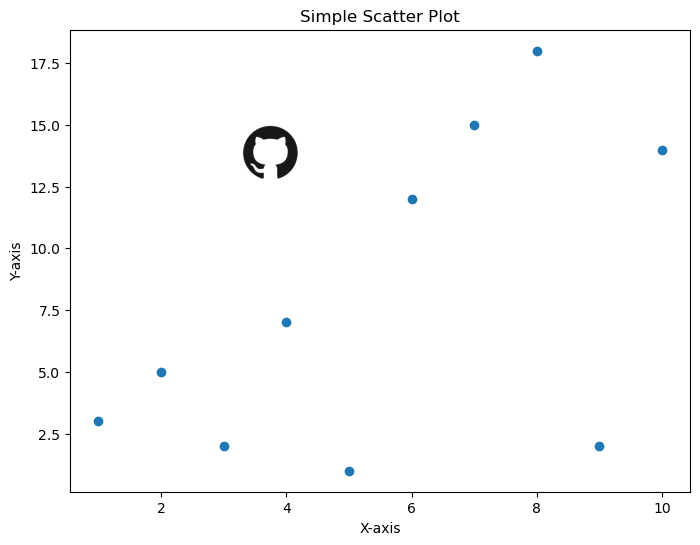

In [40]:
# Some data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [3, 5, 2, 7, 1, 12, 15, 18, 2, 14]

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot
ax.scatter(x, y)

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Simple Scatter Plot')

# Define the position and size parameters
image_xaxis = 0.3
image_yaxis = 0.6
image_width = 0.15
image_height = 0.15  # Same as width since our logo is a square

# Define the position for the image axes
ax_image = fig.add_axes([image_xaxis,
                         image_yaxis,
                         image_width,
                         image_height]
                       )

# Display the image
ax_image.imshow(image)
ax_image.axis('off')  # Remove axis of the image

# Display the plot
plt.show()

## Going further

This article showed how to __add an image__ or logo into a Matplotlib chart. 

You can see a direct application of this technique in this [beautiful stacked area chart](https://python-graph-gallery.com/web-stacked-line-chart-with-labels) where a __github logo__ is inserted in the caption.

Last but not least, feel free to visit the [matplotlib section](https://python-graph-gallery.com/matplotlib) for more general matplotlib tips and tricks! 🔥